In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("StudyHours_SVR_Dataset.csv")

In [3]:
df

,Study_Hours,Exam_Score
0,1.00,11.00
1,1.31,4.00
2,1.62,8.51
3,1.93,17.47
4,2.24,33.84
5,2.55,41.61
6,2.86,38.74
7,3.17,36.20
8,3.48,42.00
9,3.79,66.10


In [5]:
x=df[['Study_Hours']].values
y=df['Exam_Score'].values


In [8]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scaled=sc_x.fit_transform(x)
y_scaled=sc_y.fit_transform(y.reshape(-1,1)).ravel()

In [10]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf')
svr_rbf.fit(x_scaled,y_scaled)

SVR()

In [11]:
X_grid = np.arange(x.min(), x.max() + 0.1, 0.1).reshape(-1, 1)
X_grid_scaled = sc_x.transform(X_grid)

y_grid_scaled_pred = svr_rbf.predict(X_grid_scaled)
y_grid_pred = sc_y.inverse_transform(y_grid_scaled_pred.reshape(-1, 1))


In [13]:
from sklearn.metrics import (
    mean_squared_error,
    r2_score
)
# 6. Predict on the original data (for metrics)
y_scaled_pred = svr_rbf.predict(x_scaled)
y_pred = sc_y.inverse_transform(y_scaled_pred.reshape(-1, 1)).ravel()

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("MSE:", mse)
print("R²:", r2)

MSE: 68.0949985561278
R²: 0.9878438754285985


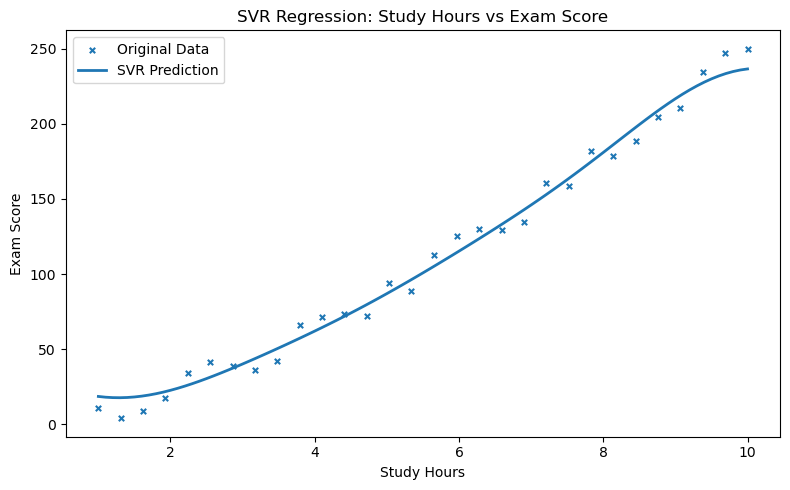

In [15]:
# 7. Plot: original points + SVR curve
plt.figure(figsize=(8, 5))
plt.scatter(x, y, s=15, marker="x", label="Original Data")
plt.plot(X_grid, y_grid_pred, linewidth=2, label="SVR Prediction")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("SVR Regression: Study Hours vs Exam Score")
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
# 8. Predict score for a new number of hours (example: 7.5 hours)
new_hours = np.array([[7.5]])
new_hours_scaled = sc_x.transform(new_hours)
new_score_scaled = svr_rbf.predict(new_hours_scaled)
new_score = sc_y.inverse_transform(new_score_scaled.reshape(-1, 1))

print(f"Predicted exam score for 7.5 study hours: {new_score[0,0]:.2f}")

Predicted exam score for 7.5 study hours: 162.89
